# <center>Lab Sheet-2</center>
# <center>Hebbian, Competitive & Error-Correction Learning</center>

**Q1. Implement Hebbian Learning Rule using NumPy for a linearly separable dataset.** 

Name: Somesh Singh
Roll Number: 233025921


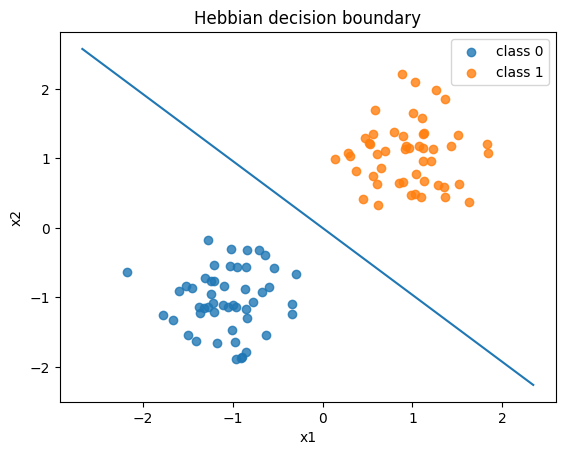

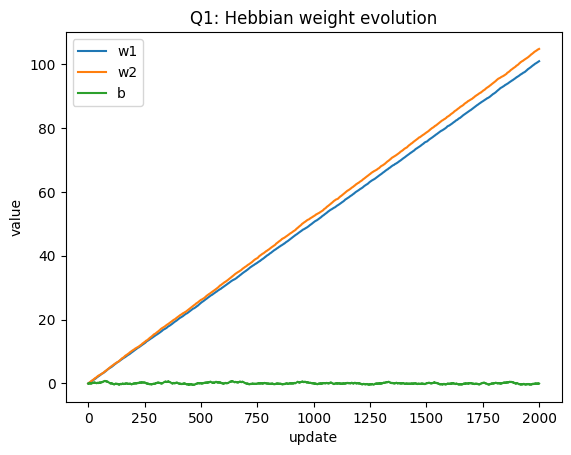

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# create a 2-class, linearly separable dataset
n = 50
X0 = np.random.multivariate_normal(mean=[-1, -1], cov=0.2*np.eye(2), size=n)
X1 = np.random.multivariate_normal(mean=[ 1,  1], cov=0.2*np.eye(2), size=n)
X = np.vstack([X0, X1])
y = np.hstack([-np.ones(n), +np.ones(n)])   # bipolar targets {-1,+1}

# augment for bias
X_aug = np.hstack([X, np.ones((X.shape[0], 1))])

# Hebbian: Δw = η * y * x
w = np.zeros(3)
eta, epochs = 0.05, 20
hist = [w.copy()]

for _ in range(epochs):
    idx = np.random.permutation(len(X_aug))
    for i in idx:
        w += eta * y[i] * X_aug[i]
        hist.append(w.copy())

w_vec, b = w[:2], w[2]

# Print the name and roll number
print("Name: Somesh Singh")
print("Roll Number: 233025921")

# plots
plt.figure()
for cls in [0,1]:
    ix = (y==(+1 if cls else -1))
    plt.scatter(X[ix,0], X[ix,1], label=f"class {cls}", alpha=0.8)
xs = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200)
if abs(w_vec[1]) < 1e-6:
    plt.axvline(-b/(w_vec[0]+1e-6))
else:
    ys = -(w_vec[0]*xs + b)/w_vec[1]
    plt.plot(xs, ys)
plt.title("Hebbian decision boundary"); plt.legend(); plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

H = np.array(hist)
plt.figure(); plt.plot(H[:,0], label="w1"); plt.plot(H[:,1], label="w2"); plt.plot(H[:,2], label="b")
plt.title("Q1: Hebbian weight evolution"); plt.xlabel("update"); plt.ylabel("value"); plt.legend()
plt.show()

**Q2. Simulate competitive learning with unsupervised clusters (e.g., 2D points).** 

Name: Somesh Singh
Roll Number: 233025921


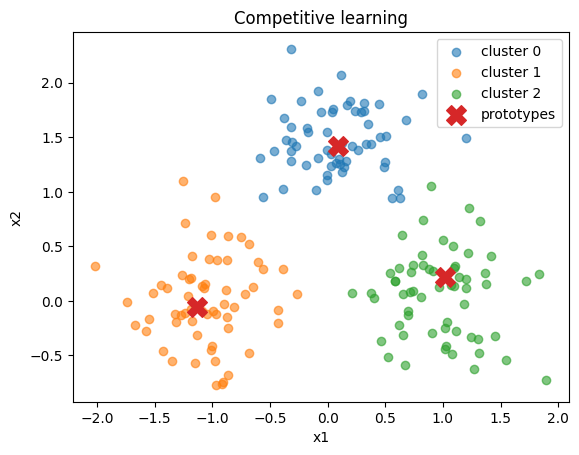

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 3 Gaussian clusters
n = 60
means = [np.array([-1,0]), np.array([1,0]), np.array([0,1.5])]
cov = 0.15*np.eye(2)
X = np.vstack([np.random.multivariate_normal(m, cov, n) for m in means])

K = 3                                    # number of neurons / prototypes
W = np.random.randn(K, 2)                # prototype vectors
eta, epochs = 0.2, 10

for _ in range(epochs):
    idx = np.random.permutation(len(X))
    for i in idx:
        x = X[i]
        j = np.argmin(np.linalg.norm(W - x, axis=1))  # winner: closest prototype
        W[j] += eta * (x - W[j])                      # move winner toward x

# Print the name and roll number
print("Name: Somesh Singh")
print("Roll Number: 233025921")

# assign points
labels = np.argmin(((X[:,None,:]-W[None,:,:])**2).sum(axis=2), axis=1)

plt.figure()
for k in range(K):
    ix = (labels==k)
    plt.scatter(X[ix,0], X[ix,1], alpha=0.6, label=f"cluster {k}")
plt.scatter(W[:,0], W[:,1], marker="X", s=200, label="prototypes")
plt.title("Competitive learning"); plt.xlabel("x1"); plt.ylabel("x2"); plt.legend()
plt.show()

**Q3. Compare Hebbian vs Error-Correction on the same dataset — plot weight evolution.** 

Name: Somesh Singh
Roll Number: 233025921


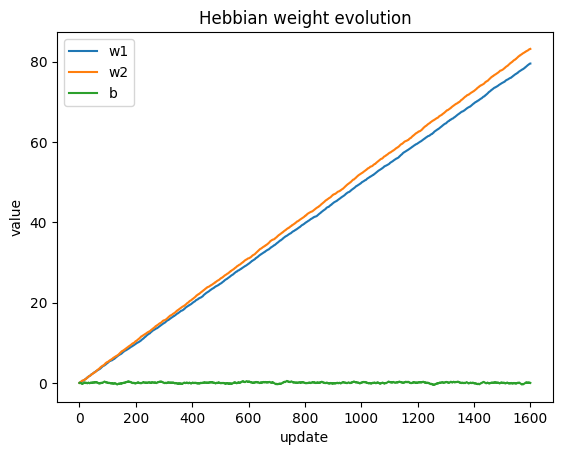

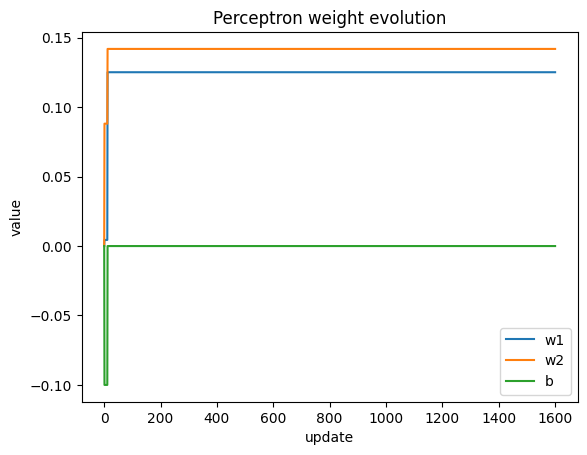

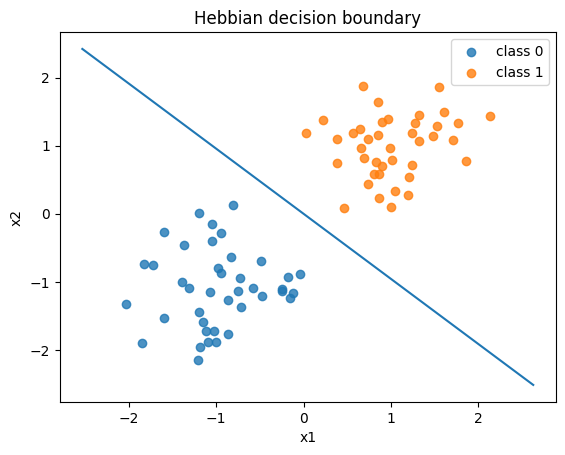

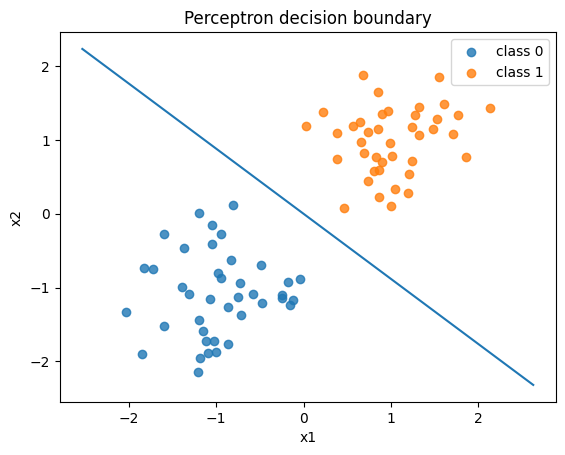

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)

# Print the name and roll number
print("Name: Somesh Singh")
print("Roll Number: 233025921")

# separable data (fresh sample)
n = 40
X0 = np.random.multivariate_normal([-1,-1], 0.25*np.eye(2), n)
X1 = np.random.multivariate_normal([ 1, 1], 0.25*np.eye(2), n)
X = np.vstack([X0, X1])
y = np.hstack([-np.ones(n), +np.ones(n)])
X_aug = np.hstack([X, np.ones((X.shape[0],1))])

# Hebbian
w_h = np.zeros(3); eta_h = 0.05; H_hist = [w_h.copy()]
# Perceptron (error-correction): Δw = η (t - ŷ) x, ŷ = sign(w·x)
w_p = np.zeros(3); eta_p = 0.05; P_hist = [w_p.copy()]
epochs = 20

for _ in range(epochs):
    idx = np.random.permutation(len(X_aug))
    for i in idx:
        # Hebbian
        w_h += eta_h * y[i] * X_aug[i]; H_hist.append(w_h.copy())
        # Perceptron
        yhat = 1 if (np.dot(w_p, X_aug[i]) >= 0) else -1
        w_p += eta_p * (y[i] - yhat) * X_aug[i]; P_hist.append(w_p.copy())

H = np.array(H_hist); P = np.array(P_hist)

plt.figure(); plt.plot(H[:,0], label="w1"); plt.plot(H[:,1], label="w2"); plt.plot(H[:,2], label="b")
plt.title("Hebbian weight evolution"); plt.xlabel("update"); plt.ylabel("value"); plt.legend()
plt.show()

plt.figure(); plt.plot(P[:,0], label="w1"); plt.plot(P[:,1], label="w2"); plt.plot(P[:,2], label="b")
plt.title("Perceptron weight evolution"); plt.xlabel("update"); plt.ylabel("value"); plt.legend()
plt.show()

# boundaries
def plot_boundary(w, b, ttl):
    xs = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200)
    plt.figure()
    for cls,val in enumerate([-1, +1]):
        ix = (y==val)
        plt.scatter(X[ix,0], X[ix,1], label=f"class {cls}", alpha=0.8)
    if abs(w[1]) < 1e-6:
        plt.axvline(-b/(w[0]+1e-6))
    else:
        ys = -(w[0]*xs + b)/w[1]
        plt.plot(xs, ys)
    plt.title(ttl); plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(); plt.show()

plot_boundary(w_h[:2], w_h[2], "Hebbian decision boundary")
plot_boundary(w_p[:2], w_p[2], "Perceptron decision boundary")

**Q4. Build a Boltzmann machine prototype (restricted to 2 visible, 1 hidden node).** 

Name: Somesh Singh
Roll Number: 233025921


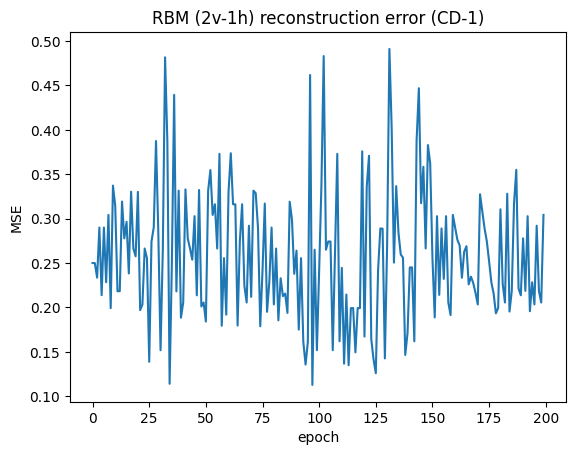

RBM params:
W = [ 0.07044584 -0.10709111] 
vb = [0.3 0. ] 
hb = [-0.1199484]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Print the name and roll number
print("Name: Somesh Singh")
print("Roll Number: 233025921")

np.random.seed(0)

def sigmoid(x): return 1.0/(1.0+np.exp(-x))
def sample_bernoulli(p): return (np.random.rand(*p.shape) < p).astype(np.float32)

# all 2-bit vectors
V = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]], dtype=np.float32)
n_visible, n_hidden = 2, 1

W  = 0.01*np.random.randn(n_visible, n_hidden)
vb = np.zeros(n_visible)
hb = np.zeros(n_hidden)

lr, epochs = 0.1, 200
recon_err = []

for _ in range(epochs):
    v0 = V[np.random.randint(0, len(V))]
    ph_v0 = sigmoid(np.dot(v0, W) + hb)        # p(h|v0)
    h0 = sample_bernoulli(ph_v0)

    pv_h0 = sigmoid(np.dot(h0, W.T) + vb)      # p(v|h0)
    v1 = sample_bernoulli(pv_h0)
    ph_v1 = sigmoid(np.dot(v1, W) + hb)

    # CD-1 updates
    W  += lr * (np.outer(v0, ph_v0) - np.outer(v1, ph_v1))
    vb += lr * (v0 - v1)
    hb += lr * (ph_v0 - ph_v1)

    recon_err.append(np.mean((pv_h0 - v0)**2))

plt.figure(); plt.plot(recon_err)
plt.title("RBM (2v-1h) reconstruction error (CD-1)")
plt.xlabel("epoch"); plt.ylabel("MSE"); plt.show()

print("RBM params:\nW =", W.flatten(), "\nvb =", vb, "\nhb =", hb)

**Q5. Simulate the Credit Assignment Problem with delayed reward (RL-style idea).**

Name: Somesh Singh
Roll Number: 233025921


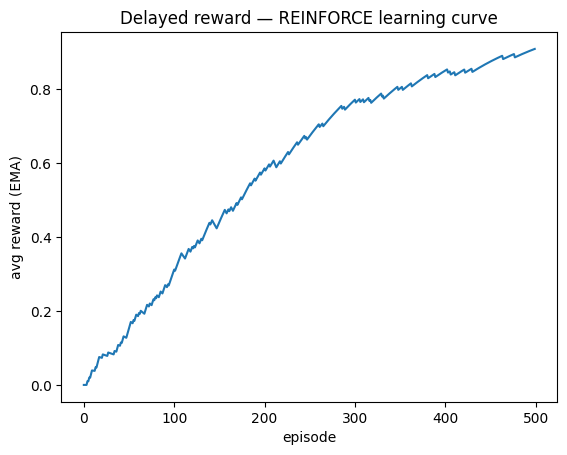

Policy preferences learned:
step-1 theta: [ 1.79125655 -1.79125655] 
step-2 theta: [ 1.79125655 -1.79125655]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Print the name and roll number
print("Name: Somesh Singh")
print("Roll Number: 233025921")

np.random.seed(123)

def softmax(z):
    z = z - np.max(z)
    e = np.exp(z)
    return e / np.sum(e)

theta1 = np.zeros(2)   # step-1 actions: [A, B]
theta2 = np.zeros(2)   # step-2 actions: [Left, Right]
lr, episodes = 0.05, 500
ema_rewards = []

def policy(theta): return softmax(theta)

for ep in range(episodes):
    p1 = policy(theta1); a1 = np.random.choice(2, p=p1)   # 0=A, 1=B
    p2 = policy(theta2); a2 = np.random.choice(2, p=p2)   # 0=Left, 1=Right

    reward = 1.0 if (a1==0 and a2==0) else 0.0            # delayed

    g1 = np.zeros(2); g1[a1] = 1.0; g1 -= p1               # ∇ log π(a1)
    g2 = np.zeros(2); g2[a2] = 1.0; g2 -= p2               # ∇ log π(a2)

    theta1 += lr * reward * g1
    theta2 += lr * reward * g2

    ema = reward if not ema_rewards else 0.99*ema_rewards[-1] + 0.01*reward
    ema_rewards.append(ema)

plt.figure(); plt.plot(ema_rewards)
plt.title("Delayed reward — REINFORCE learning curve")
plt.xlabel("episode"); plt.ylabel("avg reward (EMA)"); plt.show()

print("Policy preferences learned:\nstep-1 theta:", theta1, "\nstep-2 theta:", theta2)